## Динамика биологических популяций
11. (A) Модель Мальтуса.
12. (A) Модель Ферхюльста.
13. (B) Модель роста биологической популяции с порогом.
14. (B) Модель роста биологической популяции с порогом и ограничением на ресурсы.
15. (A) Модель Лотки — Вольтерры (модель хищник — жертва).
16. (B) Модифицированная модель Лотки — Вольтерры.
17. (C) Модель межвидовой конкуренции.

In [1]:
import sympy as sp
from scipy.integrate import odeint 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ODEplot import *

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
sns.set(style='whitegrid', context='notebook', palette=tuple(colors), 
        rc={'axes.labelsize': 16})

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
sp.init_printing()

### Модель Мальтуса.

In [2]:
x = sp.symbols('x', cls=sp.Function)
t,r = sp.symbols('t,r')

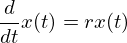

In [3]:
Malthusian = sp.Eq(x(t).diff(t), r*x(t))
Malthusian

In [4]:
# some concrete parameters
r0 = 2
r1 = -1

In [5]:
ics = {
    x(0) : 3
}

In [6]:
Malthusian_soln = sp.dsolve(Malthusian, x(t))
Malthusian_soln

In [7]:
concrete_model_positive = sp.dsolve(Malthusian, x(t), ics=ics)
concrete_model_positive = concrete_model_positive.subs(r,r0)
concrete_model_positive

In [8]:
concrete_model_negative = sp.dsolve(Malthusian, x(t), ics=ics)
concrete_model_negative = concrete_model_negative.subs(r,r1)
concrete_model_negative

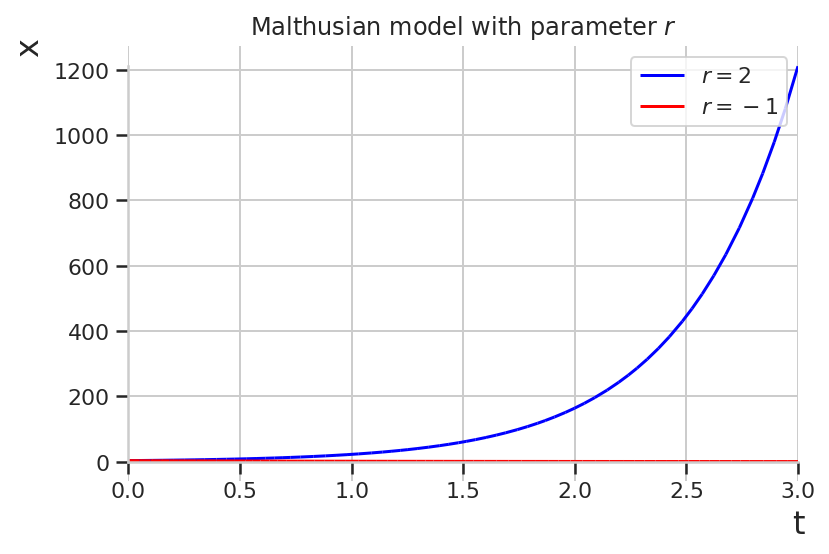

In [16]:
plot = sp.plot(concrete_model_positive.rhs, (t,0,3), line_color = 'blue', show = False, ylabel = 'x')
plot.title = "Malthusian model with parameter $r$"
plot[0].label = "$r=2$"
plot.append(sp.plot(concrete_model_negative.rhs, (t,0,3), line_color = 'red', show = False)[0])
plot[1].label = "$r=-1$"
plot.legend = True
plot.show()

In [10]:
def Malthusian_RHS(x,t,r):
    return np.array(r*x)

#r parameter
r = 1
args = (r,)

init_cond_1 = np.array([1,])
init_cond_2 = np.array([2])
t = np.linspace(0,10,80)

v =  odeint(Malthusian_RHS, init_cond_2, t, args = args)

## Модель Ферхюльста.

In [11]:
x = sp.symbols('x', cls=sp.Function)
t,r, K = sp.symbols('t,r, K')  # r, K > 0

Verhulst equation is the next one $$ \frac{dN}{dt} = \frac{rN(K-N)}{K} $$
Let's divide this equation by $ K $ and make this substitution: $$ x := \frac{N}{t} $$
Thus, we have this equation: $$ \frac{dx}{dt} = rx(1-x) $$

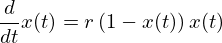

In [12]:
Verhulst = sp.Eq(x(t).diff(t), r*x(t)*(1-x(t)))
Verhulst

In [13]:
# different r-parameters
r0 = 1
r1 = 2
r2 = 3

In [19]:
# different ics
ics0 = {
    x(0) : 0.1
}
ics1 = {
    x(0) : 3
}
ics2 = {
    x(0) : 4
}

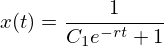

In [15]:
Verhulst_soln = sp.dsolve(Verhulst, x(t))
Verhulst_soln

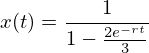

In [166]:
concrete_soln = sp.dsolve(Verhulst, x(t), ics=ics1)
concrete_soln

Let's make some plots with different ics or r-parameters:

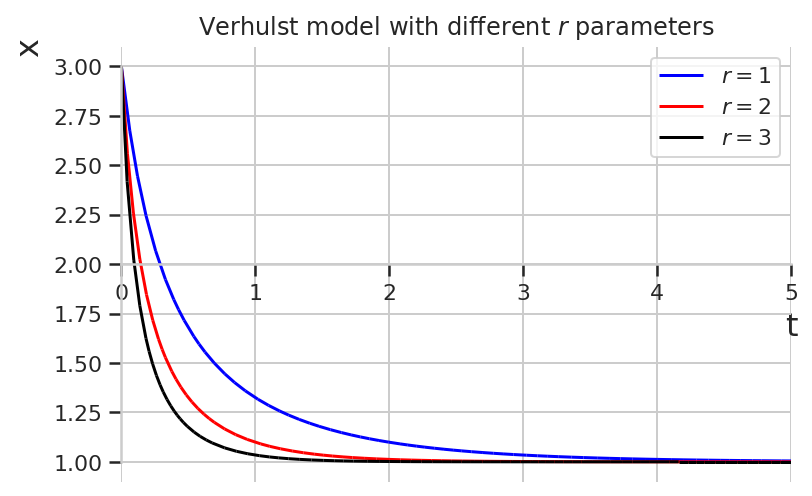

In [170]:
plot = sp.plot(concrete_soln.subs(r,r0).rhs, (t,0,5), line_color = 'blue', show = False, ylabel = 'x')
plot[0].label= "$r=1$"
plot.append(sp.plot(concrete_soln.subs(r,r1).rhs, (t,0,5), line_color = 'red', show = False, ylabel = 'x')[0])
plot[1].label = "$r=2$"
plot.append(sp.plot(concrete_soln.subs(r,r2).rhs, (t,0,5), line_color = 'black', show = False, ylabel = 'x')[0])
plot[2].label = "$r=3$"
plot.title = "Verhulst model with different $r$ parameters"
plot.legend = True
plot.show()

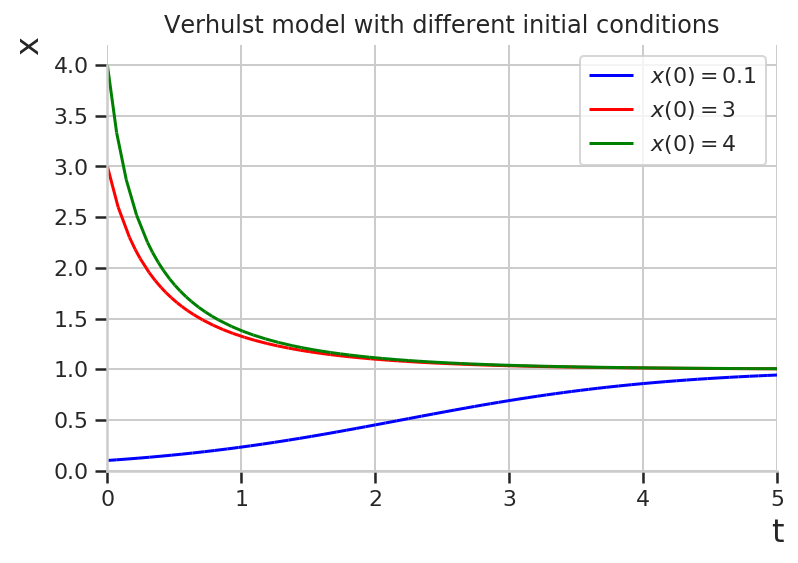

In [20]:
Verhulst = Verhulst.subs(r, r0)
concrete_soln = sp.dsolve(Verhulst, x(t), ics=ics0)
ics_list = [ics1, ics2]
color_list = ['red', 'green']
plot = sp.plot(concrete_soln.rhs, (t,0,5), line_color = 'blue', show = False, ylabel = 'x')
plot[0].label = "$x(0)={}$".format(ics0[x(0)])
for i in range(0,len(ics_list)):
    plot.append(sp.plot(sp.dsolve(Verhulst, x(t), ics=ics_list[i]).rhs, (t,0,5), line_color = color_list[i], show = False, ylabel = 'x')[0])
    plot[i+1].label = "$x(0)={}$".format(ics_list[i][x(0)])
plot.title = "Verhulst model with different initial conditions"
plot.legend = True
plot.show()

## Модель роста биологической популяции с порогом.

In [32]:
x = sp.symbols('x', cls=sp.Function)
t,r,D,s = sp.symbols('t,r,D,s')  # r, s, D > 0: r>s

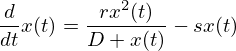

In [33]:
biased_non_bounded_model = sp.Eq(x(t).diff(t), r*x(t)*x(t)/(D+x(t)) - s*x(t))
# r > s > 0 ; D > 0
biased_non_bounded_model

In [111]:
def model_RHS(x,t, r, D, s):
    return np.array(r*x*x/(D+x) - s*x)

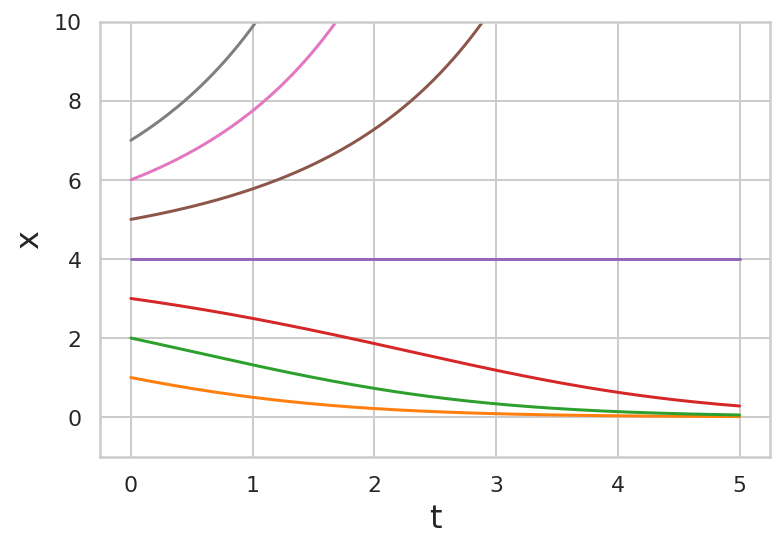

In [229]:
args = (2, 4, 1)
ic = np.array([1])
t = np.linspace(0,5,200)
# Plot
for ic in range(1, 2*args[1]*1):
    soln = odeint(model_RHS, ic, t, args = args)
    plt.plot(t, soln, color = 'C{}'.format(ic))
plt.ylim(-1,10)
plt.xlabel('t')
plt.ylabel('x')
plt.show()

### (B) Модель роста биологической популяции с порогом и ограничением на ресурсы.

In [25]:
x = sp.symbols('x', cls=sp.Function)
t,r,D,s,K = sp.symbols('t,r,D,s,K')  # r, s, D > 0: r>s

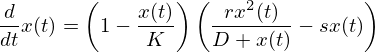

In [26]:
biased_bounded_model = sp.Eq(x(t).diff(t), (r*x(t)*x(t)/(D+x(t)) - s*x(t))*(1-x(t)/K))
biased_bounded_model

In [232]:
def model(x,t, r, D, s,K):
    return (r*x*x/(D+x) - s*x)*(1-x/K)

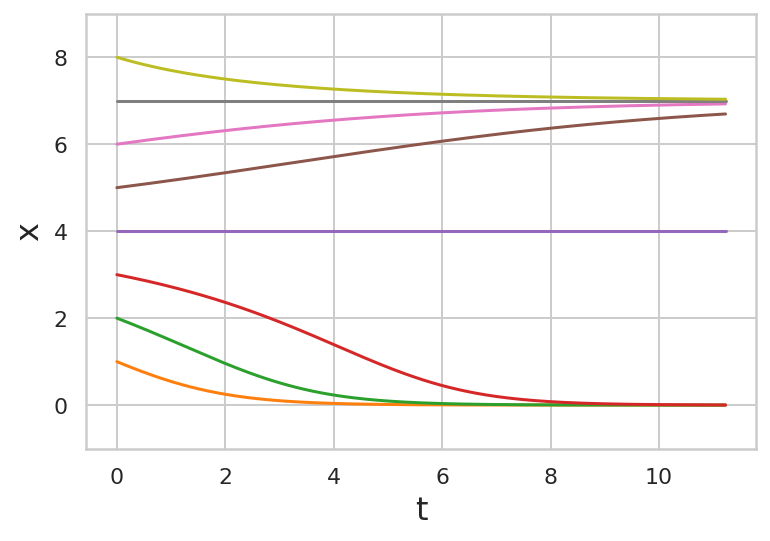

In [265]:
# Plot
args = (2, 4, 1, 7)
ic = np.array([1])
t = np.linspace(0,4*np.log2(args[3]),200)
# Plot
for ic in range(1, 2*args[1]+1):
    soln = odeint(model, ic, t, args = args)
    plt.plot(t, soln, color = 'C{}'.format(ic))
plt.ylim(-1,args[3]+2)
plt.xlabel('t')
plt.ylabel('x')
plt.show()

### (A) Модель Лотки — Вольтерры (модель хищник — жертва).

Lotka-Volterra Model is this system of equations:
$$ 
\frac{dx}{dt} = rx - mxy  
$$
$$ 
\frac{dy}{dt} = -sy + pmxy
$$

In [266]:
def Volterra(sys, t, r, s, m, p):
    x,y = sys
    return np.array([r*x - m*x*y,
                     -s*x + p*m*x*y])

Text(0.5, 1.0, 'Evolution of fox and rabbit populations')

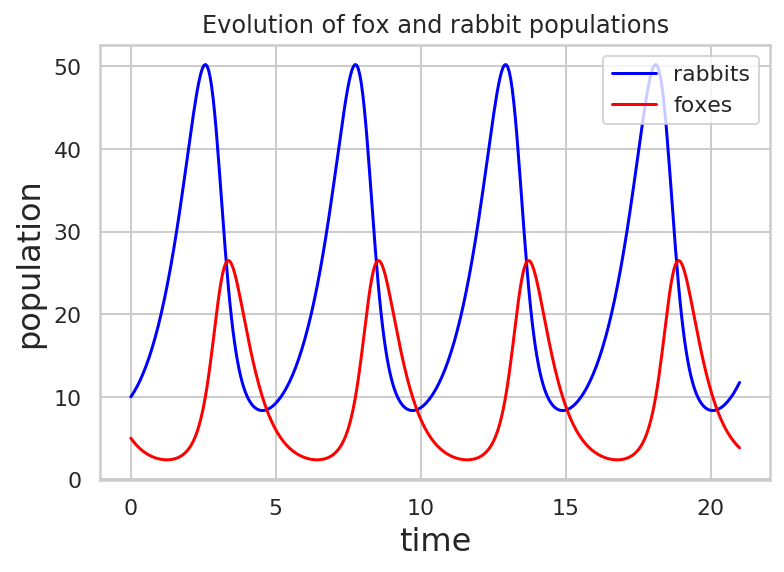

In [325]:
t = np.linspace(0,21,400)
ics = np.array([10,5])
args = (1,1.75,0.1,0.75,)
soln = odeint(Volterra, ics, t, args=args)
plt.plot(t,soln.T[0], 'b-', label='rabbits')
plt.plot(t,soln.T[1], 'r-', label='foxes')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of fox and rabbit populations')

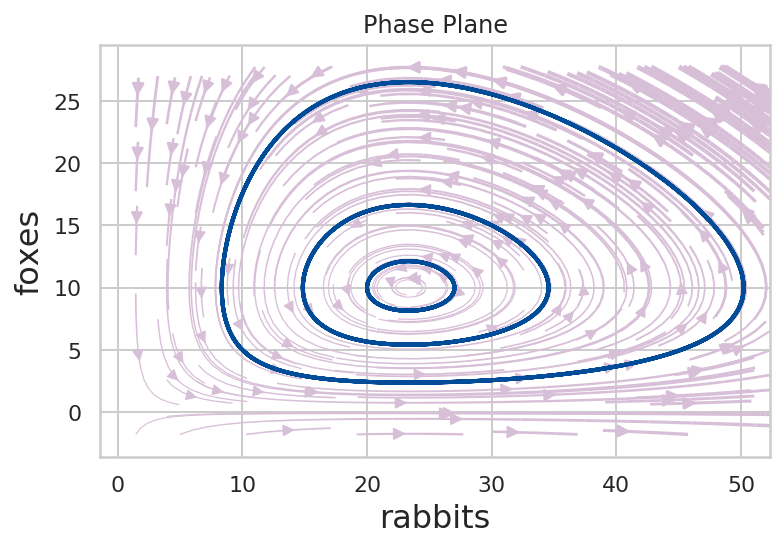

In [326]:
#Phase plane
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('rabbits')
ax.set_ylabel('foxes')
ax.set_aspect('equal')

for i in range(1,4):
    ax = plot_traj(ax,Volterra, i*ics, t,  color = '#004C99', args=args)
    ax = plot_flow_field(ax, Volterra, ax.get_xlim(), ax.get_ylim(), args=args)
plt.title('Phase Plane')
plt.show()

### (B) Модифицированная модель Лотки — Вольтерры.

In [22]:
def Volterra_modified(sys, t, r, K, s, m, p):
    x,y = sys
    return np.array([r*x*(1-x/K) - m*x*y,
                     -s*y + p*m*x*y])

Text(0.5, 1.0, 'Evolution of fox and rabbit populations')

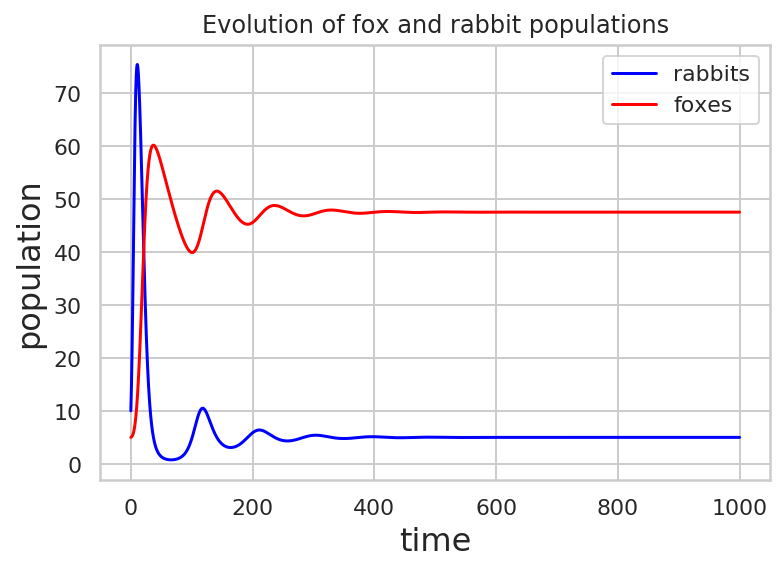

In [28]:
t = np.linspace(0,1000,10000)
ics = np.array([10,5])
args = (0.5,100,0.01,0.01,0.2,)
soln = odeint(Volterra_modified, ics, t, args=args)
plt.plot(t,soln.T[0], 'b-', label='rabbits')
plt.plot(t,soln.T[1], 'r-', label='foxes')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of fox and rabbit populations')

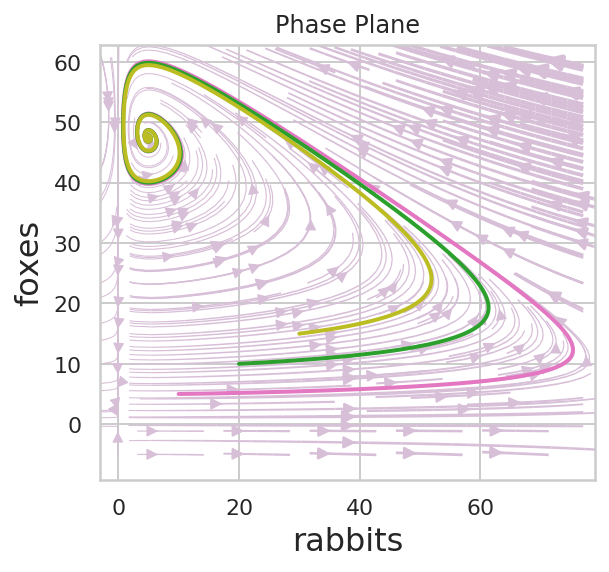

In [29]:
#Phase plane
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('rabbits')
ax.set_ylabel('foxes')
ax.set_aspect('equal')

for i in range(1,4):
    ax = plot_traj(ax,Volterra_modified, i*ics, t,  color = 'C{}'.format(6*i), args=args)
    ax = plot_flow_field(ax, Volterra_modified, ax.get_xlim(), ax.get_ylim(), args=args)
plt.title('Phase Plane')
plt.show()

### (C) Модель межвидовой конкуренции.

In [33]:
def Species_comp(sys, t, r, s, a, b, K, L):
    x,y = sys
    return np.array([r*x*(1 - (x+a*y)/K),
                     s*y*(1 - (y+b*x)/L)])

In [45]:
t = np.linspace(0,50,10000)
ics = np.array([10,5])
args = (0.4,0.13,10,10,20,10)

Text(0.5, 1.0, 'Evolution of fox and rabbit populations')

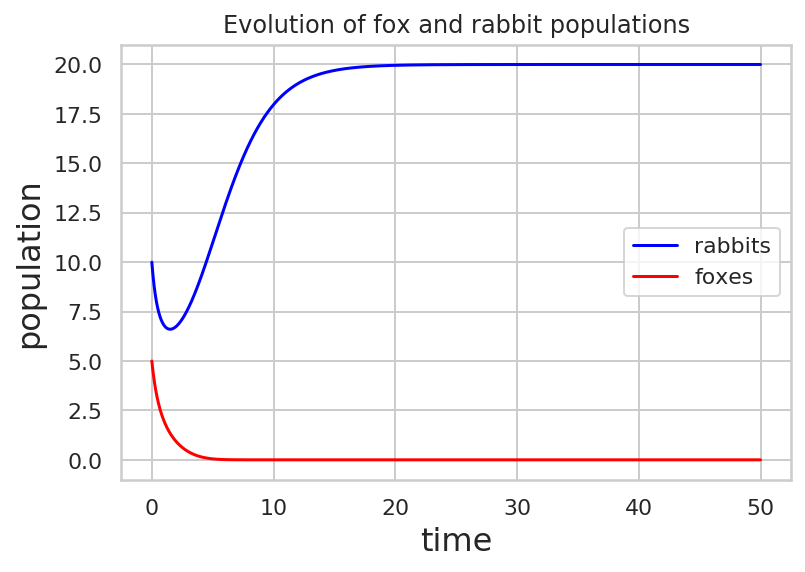

In [46]:
soln = odeint(Species_comp, ics, t, args=args)
plt.plot(t,soln.T[0], 'b-', label='rabbits')
plt.plot(t,soln.T[1], 'r-', label='foxes')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of fox and rabbit populations')

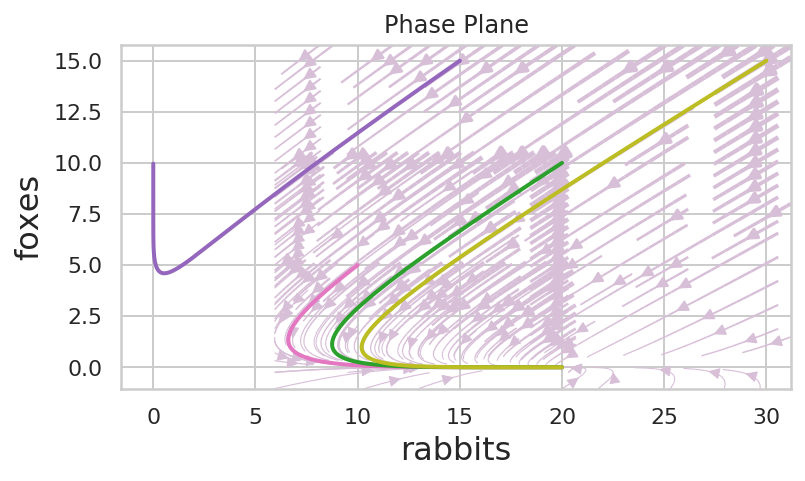

In [49]:
#Phase plane
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('rabbits')
ax.set_ylabel('foxes')
ax.set_aspect('equal')
#ax.set_xlim(-1,300)

for i in range(1,4):
    ax = plot_traj(ax,Species_comp, i*ics, t,  color = 'C{}'.format(6*i), args=args)
    ax = plot_flow_field(ax, Species_comp, ax.get_xlim(), ax.get_ylim(), args=args)
ax = plot_traj(ax,Species_comp, np.array([15,15]), t,  color = 'C{}'.format(4), args=args)
plt.title('Phase Plane')
plt.show()